# Experiment 4: different algorithmic motifs

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%bash
make --directory=../Stencil_code/ clean

make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report result_*.py
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'


In [3]:
def read_field_from_file(filename, num_halo=None):
    (rank, nbits, num_halo, nx, ny, nz) = np.fromfile(filename, dtype=np.int32, count=6)
    offset=(3 + rank) * 32 // nbits
    data = np.fromfile(filename, dtype=np.float32 if nbits == 32 else np.float64, \
                       count=nz * ny * nx + offset)
    if rank == 3:
        return np.reshape(data[offset:], (nz, ny, nx))
    else:
        return np.reshape(data[offset:], (ny, nx))

def validate_results():
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    in_field = read_field_from_file('in_field.dat')
    k_lev = in_field.shape[0] // 2
    im1 = axs[0].imshow(in_field[k_lev, :, :], origin='lower', vmin=-0.1, vmax=1.1);
    fig.colorbar(im1, ax=axs[0]);
    axs[0].set_title('Initial condition (k = {})'.format(k_lev));

    out_field = read_field_from_file('out_field.dat')
    k_lev = out_field.shape[0] // 2
    im2 = axs[1].imshow(out_field[k_lev, :, :], origin='lower', vmin=-0.1, vmax=1.1);
    fig.colorbar(im2, ax=axs[1]);
    axs[1].set_title('Final result (k = {})'.format(k_lev));
    
    plt.show()

First: look at different algorithmic complexities.

In [4]:
%%bash
module load daint-gpu
module switch PrgEnv-gnu PrgEnv-cray
module load perftools-lite

versions=('kblocking' 'averaging-nn' 'averaging-nnn' 'averaging-nn-ij' 'averaging-nnn-ij' 'lap-nn' 'lap-nnn' 'lap-nn-ij' 'lap-nnn-ij' 'ijblocking-inline') ## THIS SHOULD BE A COPY OF VERSIONS IN CELL BELOW

PAT_RT_EXPFILE_DIR=Flops_reports

echo "===== cleaning up ====="
make --directory=../Stencil_code/ clean
echo "===== compiling ====="
for version in "${versions[@]}"
do 
       make --directory=../Stencil_code/ VERSION="$version"
done


===== cleaning up =====
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report result_*.py
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
===== compiling =====
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c m_utils.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-kblocking.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-kblocking.o -o stencil2d-kblocking.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-kblocking.x' (lite-samples) ...OK


cp stencil2d-kblocking.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-averaging-nn.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-averaging-nn.o -o stencil2d-averaging-nn.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-averaging-nn.x' (lite-samples) ...OK


cp stencil2d-averaging-nn.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-averaging-nnn.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-averaging-nnn.o -o stencil2d-averaging-nnn.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-averaging-nnn.x' (lite-samples) ...OK


cp stencil2d-averaging-nnn.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-averaging-nn-ij.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-averaging-nn-ij.o -o stencil2d-averaging-nn-ij.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-averaging-nn-ij.x' (lite-samples) ...OK


cp stencil2d-averaging-nn-ij.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-averaging-nnn-ij.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-averaging-nnn-ij.o -o stencil2d-averaging-nnn-ij.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-averaging-nnn-ij.x' (lite-samples) ...OK


cp stencil2d-averaging-nnn-ij.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-lap-nn.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-lap-nn.o -o stencil2d-lap-nn.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-lap-nn.x' (lite-samples) ...OK


cp stencil2d-lap-nn.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-lap-nnn.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-lap-nnn.o -o stencil2d-lap-nnn.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-lap-nnn.x' (lite-samples) ...OK


cp stencil2d-lap-nnn.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-lap-nn-ij.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-lap-nn-ij.o -o stencil2d-lap-nn-ij.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-lap-nn-ij.x' (lite-samples) ...OK


cp stencil2d-lap-nn-ij.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-lap-nnn-ij.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-lap-nnn-ij.o -o stencil2d-lap-nnn-ij.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-lap-nnn-ij.x' (lite-samples) ...OK


cp stencil2d-lap-nnn-ij.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
make: Entering directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-ijblocking-inline.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o stencil2d-ijblocking-inline.o -o stencil2d-ijblocking-inline.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-ijblocking-inline.x' (lite-samples) ...OK


cp stencil2d-ijblocking-inline.x stencil2d.x
make: Leaving directory '/users/class169/Project/HPC4WC_project_ijblocking/Stencil_code'





For each algorithm, get the CrayPat report to analyze the performance. From these, obtain Memory bandwidth and throughput.
Plot those in a scatter plot.

CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
srun: Job 55705983 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 55705983
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02
CrayPat/X:  Version 21.09.0 Revision b02949528  08/17/21 03:14:02


In [6]:
nx = 128
ny = 128
nz = 64

grid_size = nx * ny * nz
num_it = 128

versions = ['kblocking', 'averaging-nn', 'averaging-nnn', 'averaging-nn-ij','averaging-nnn-ij', 'lap-nn', 'lap-nnn', 'lap-nn-ij', 'lap-nnn-ij', 'ijblocking-inline']

# get FLOPs
flops_in_diffusion = np.array([12, 4, 8, 4, 8, 7, 11, 7, 11, 12])
flops = num_it * grid_size * flops_in_diffusion

# get runtimes
runtimes = np.array([0.1824892, 0.1131914, 0.1421688, 0.05035949, 0.05049801, 0.1164947, 0.1384563, 0.9790103, 0.1610198, 0.5269926])
                    
#for i, v in enumerate(versions):
#    command = f"!srun -n 1 ./stencil2d-{v}.x+orig --nx 128 --ny 128 --nz 64 --num_iter 1"
#    exec(output.nlstr)
#    runtimes[i] = data[0,-1]

# get throughput
throughput = flops/runtimes


In [7]:
throughput

array([8.82579756e+09, 4.74303624e+09, 7.55258414e+09, 1.06607694e+10,
       2.12630522e+10, 8.06495142e+09, 1.06632563e+10, 9.59667223e+08,
       9.16902771e+09, 3.05623406e+09])

In [8]:
flops

array([1610612736,  536870912, 1073741824,  536870912, 1073741824,
        939524096, 1476395008,  939524096, 1476395008, 1610612736])

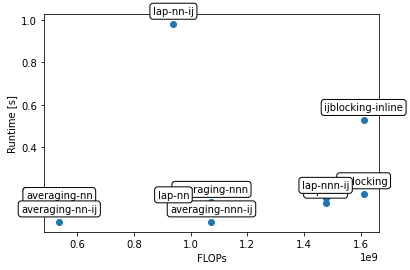

In [9]:
plt.scatter(flops, runtimes)

for i, v in enumerate(versions):
    plt.annotate(v, (flops[i], runtimes[i]), textcoords="offset points", xytext=(0,10), ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
plt.xlabel('FLOPs')
plt.ylabel('Runtime [s]')
plt.show()

In [12]:
make_craypat = False # stop compiling all cells if craypat shouldn't be run
import sys
if not make_craypat:
    sys.exit()

In [ ]:
%%bash
versions=('kblocking' 'averaging-nn' 'averaging-nnn' 'averaging-nn-ij' 'averaging-nnn-ij' 'lap-nn' 'lap-nnn' 'lap-nn-ij' 'lap-nnn-ij' 'ijblocking-inline') ## THIS SHOULD BE A COPY OF VERSIONS IN CELL BELOW

for version in "${versions[@]}"
do 
       srun -n 1 ../Stencil_code/stencil2d-"$version".x --nx 128 --ny 128 --nz 64 --num_iter 128 > Flops_reports/report_"$version".txt
done